# Phân tích và trực quan dữ liệu - Wine Quality (Red Wine)


---

## Giới thiệu
Bộ dữ liệu **Wine Quality** (chất lượng rượu vang đỏ) là một tập dữ liệu kinh điển trong lĩnh vực *Machine Learning* và *Data Analysis*.  
Dữ liệu chứa các **thuộc tính hoá học** của rượu (như độ axit, lượng đường, pH, nồng độ cồn...) cùng với **điểm chất lượng** được đánh giá bởi các chuyên gia.

---

## Mục tiêu
- Khám phá cấu trúc và đặc điểm của dữ liệu.  
- Thực hiện **trực quan hóa dữ liệu** để hiểu rõ mối quan hệ giữa các đặc trưng và chất lượng rượu.  
- Chuẩn bị bước nền cho việc **phân loại chất lượng rượu** bằng các mô hình học máy.

---

##  Nguồn dữ liệu
Bộ dữ liệu được lấy từ:
🔗 [Wine Quality Data Set](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data)

---

## 📊 Thông tin về tập dữ liệu

| Tên cột | Ý nghĩa | Đơn vị |
|:---|:---|:---|
| fixed acidity | Axit cố định | g(tartaric acid)/dm³ |
| volatile acidity | Axit bay hơi | g(acetic acid)/dm³ |
| citric acid | Axit citric | g/dm³ |
| residual sugar | Lượng đường còn lại | g/dm³ |
| chlorides | Hàm lượng muối | g(sodium chloride)/dm³ |
| free sulfur dioxide | Lượng SO₂ tự do | mg/dm³ |
| total sulfur dioxide | Tổng lượng SO₂ | mg/dm³ |
| density | Mật độ | g/cm³ |
| pH | Độ pH | - |
| sulphates | Hàm lượng sunphat | g(potassium sulphate)/dm³ |
| alcohol | Nồng độ cồn | % vol |
| quality | Chất lượng rượu | 0–10 |

---






In [54]:
# xem thông tin dữ liệu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Đọc dữ liệu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, sep=';')

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [56]:
wine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [57]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
wine_duplicate = wine.drop_duplicates()
wine_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [59]:
print(wine.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [60]:
print(wine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [61]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


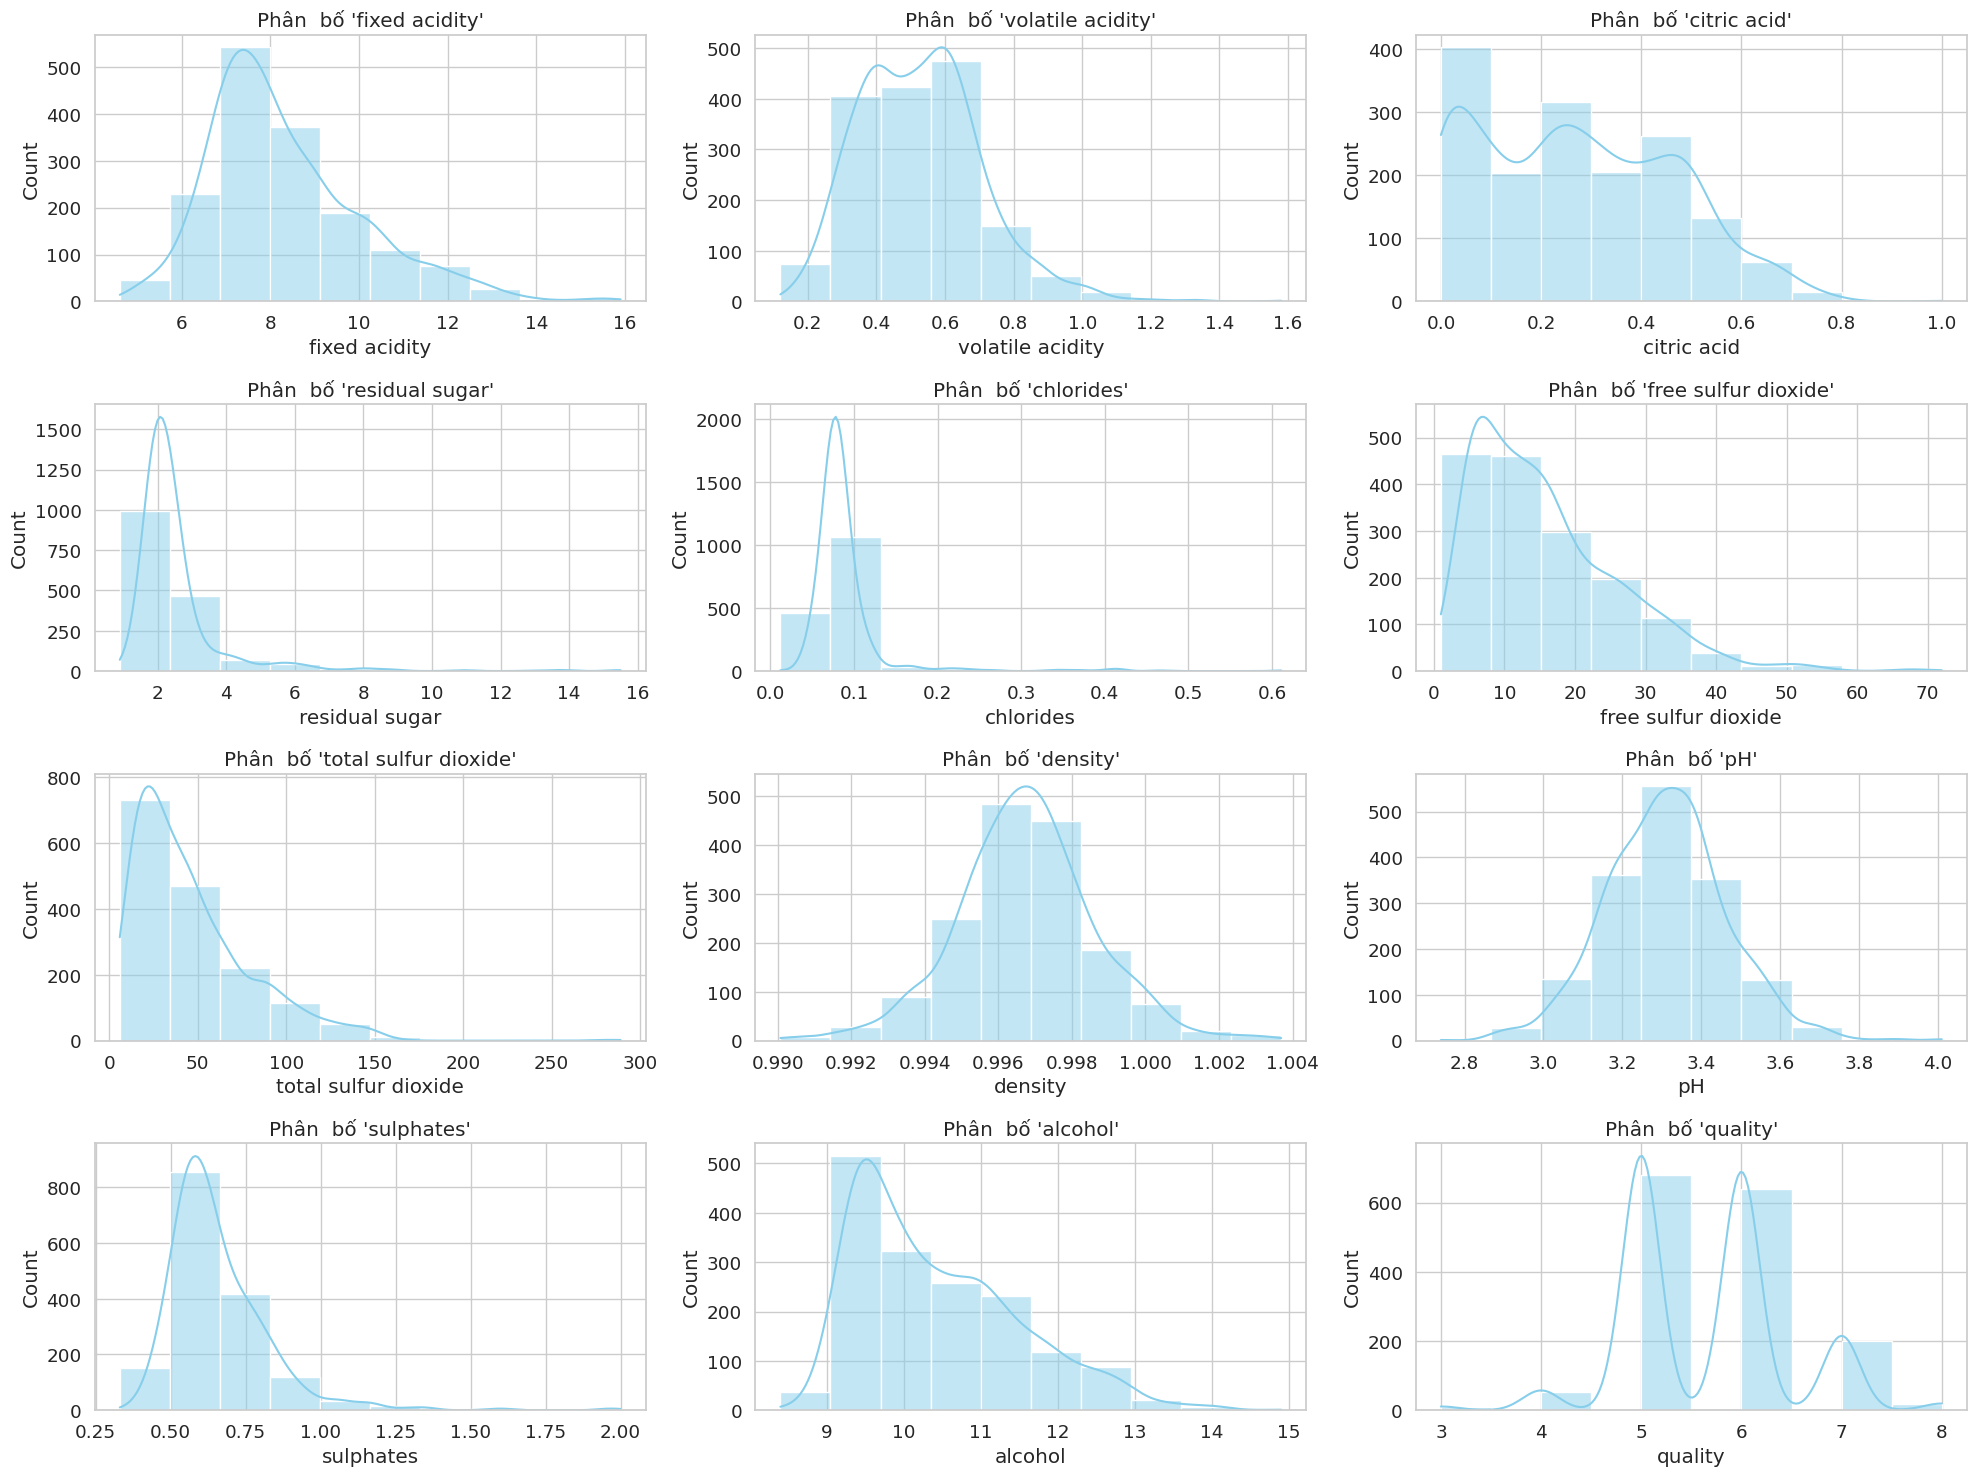

In [62]:


cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
        "chlorides", "free sulfur dioxide", "total sulfur dioxide",
        "density", "pH", "sulphates", "alcohol", "quality"]
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()


for i, col in enumerate(cols):
    sns.histplot(
        data=wine, x=col,
        bins=10, kde=True,
        color="skyblue", ax=axes[i]
    ).set(title=f"Phân  bố '{col}'")


for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


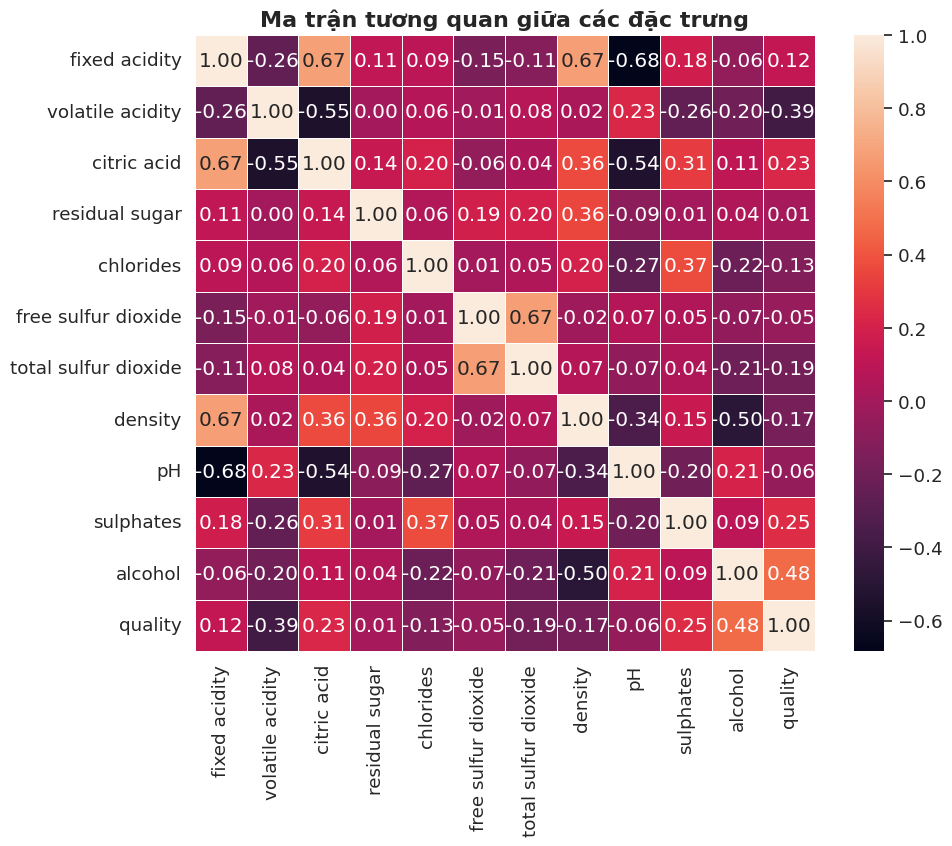

In [63]:
plt.figure(figsize=(10,8))
corr = wine.corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Ma trận tương quan giữa các đặc trưng', fontsize=16, fontweight='bold')
plt.show()


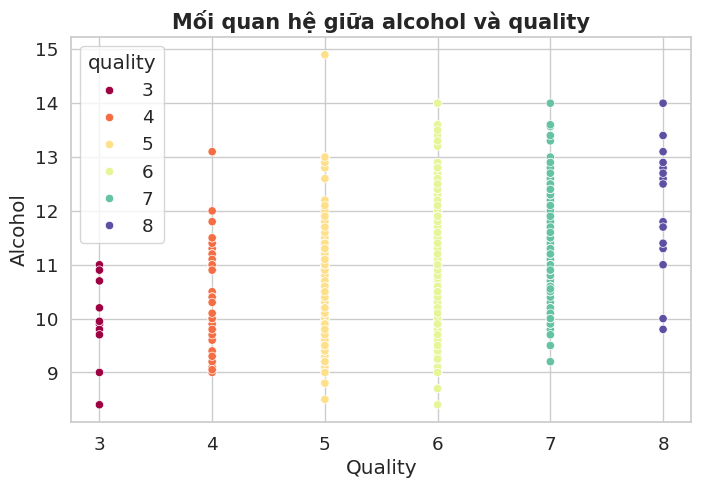

In [64]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='quality', y='alcohol', hue='quality', data=wine, palette='Spectral')
plt.title('Mối quan hệ giữa alcohol và quality', fontsize=15, fontweight='bold')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()


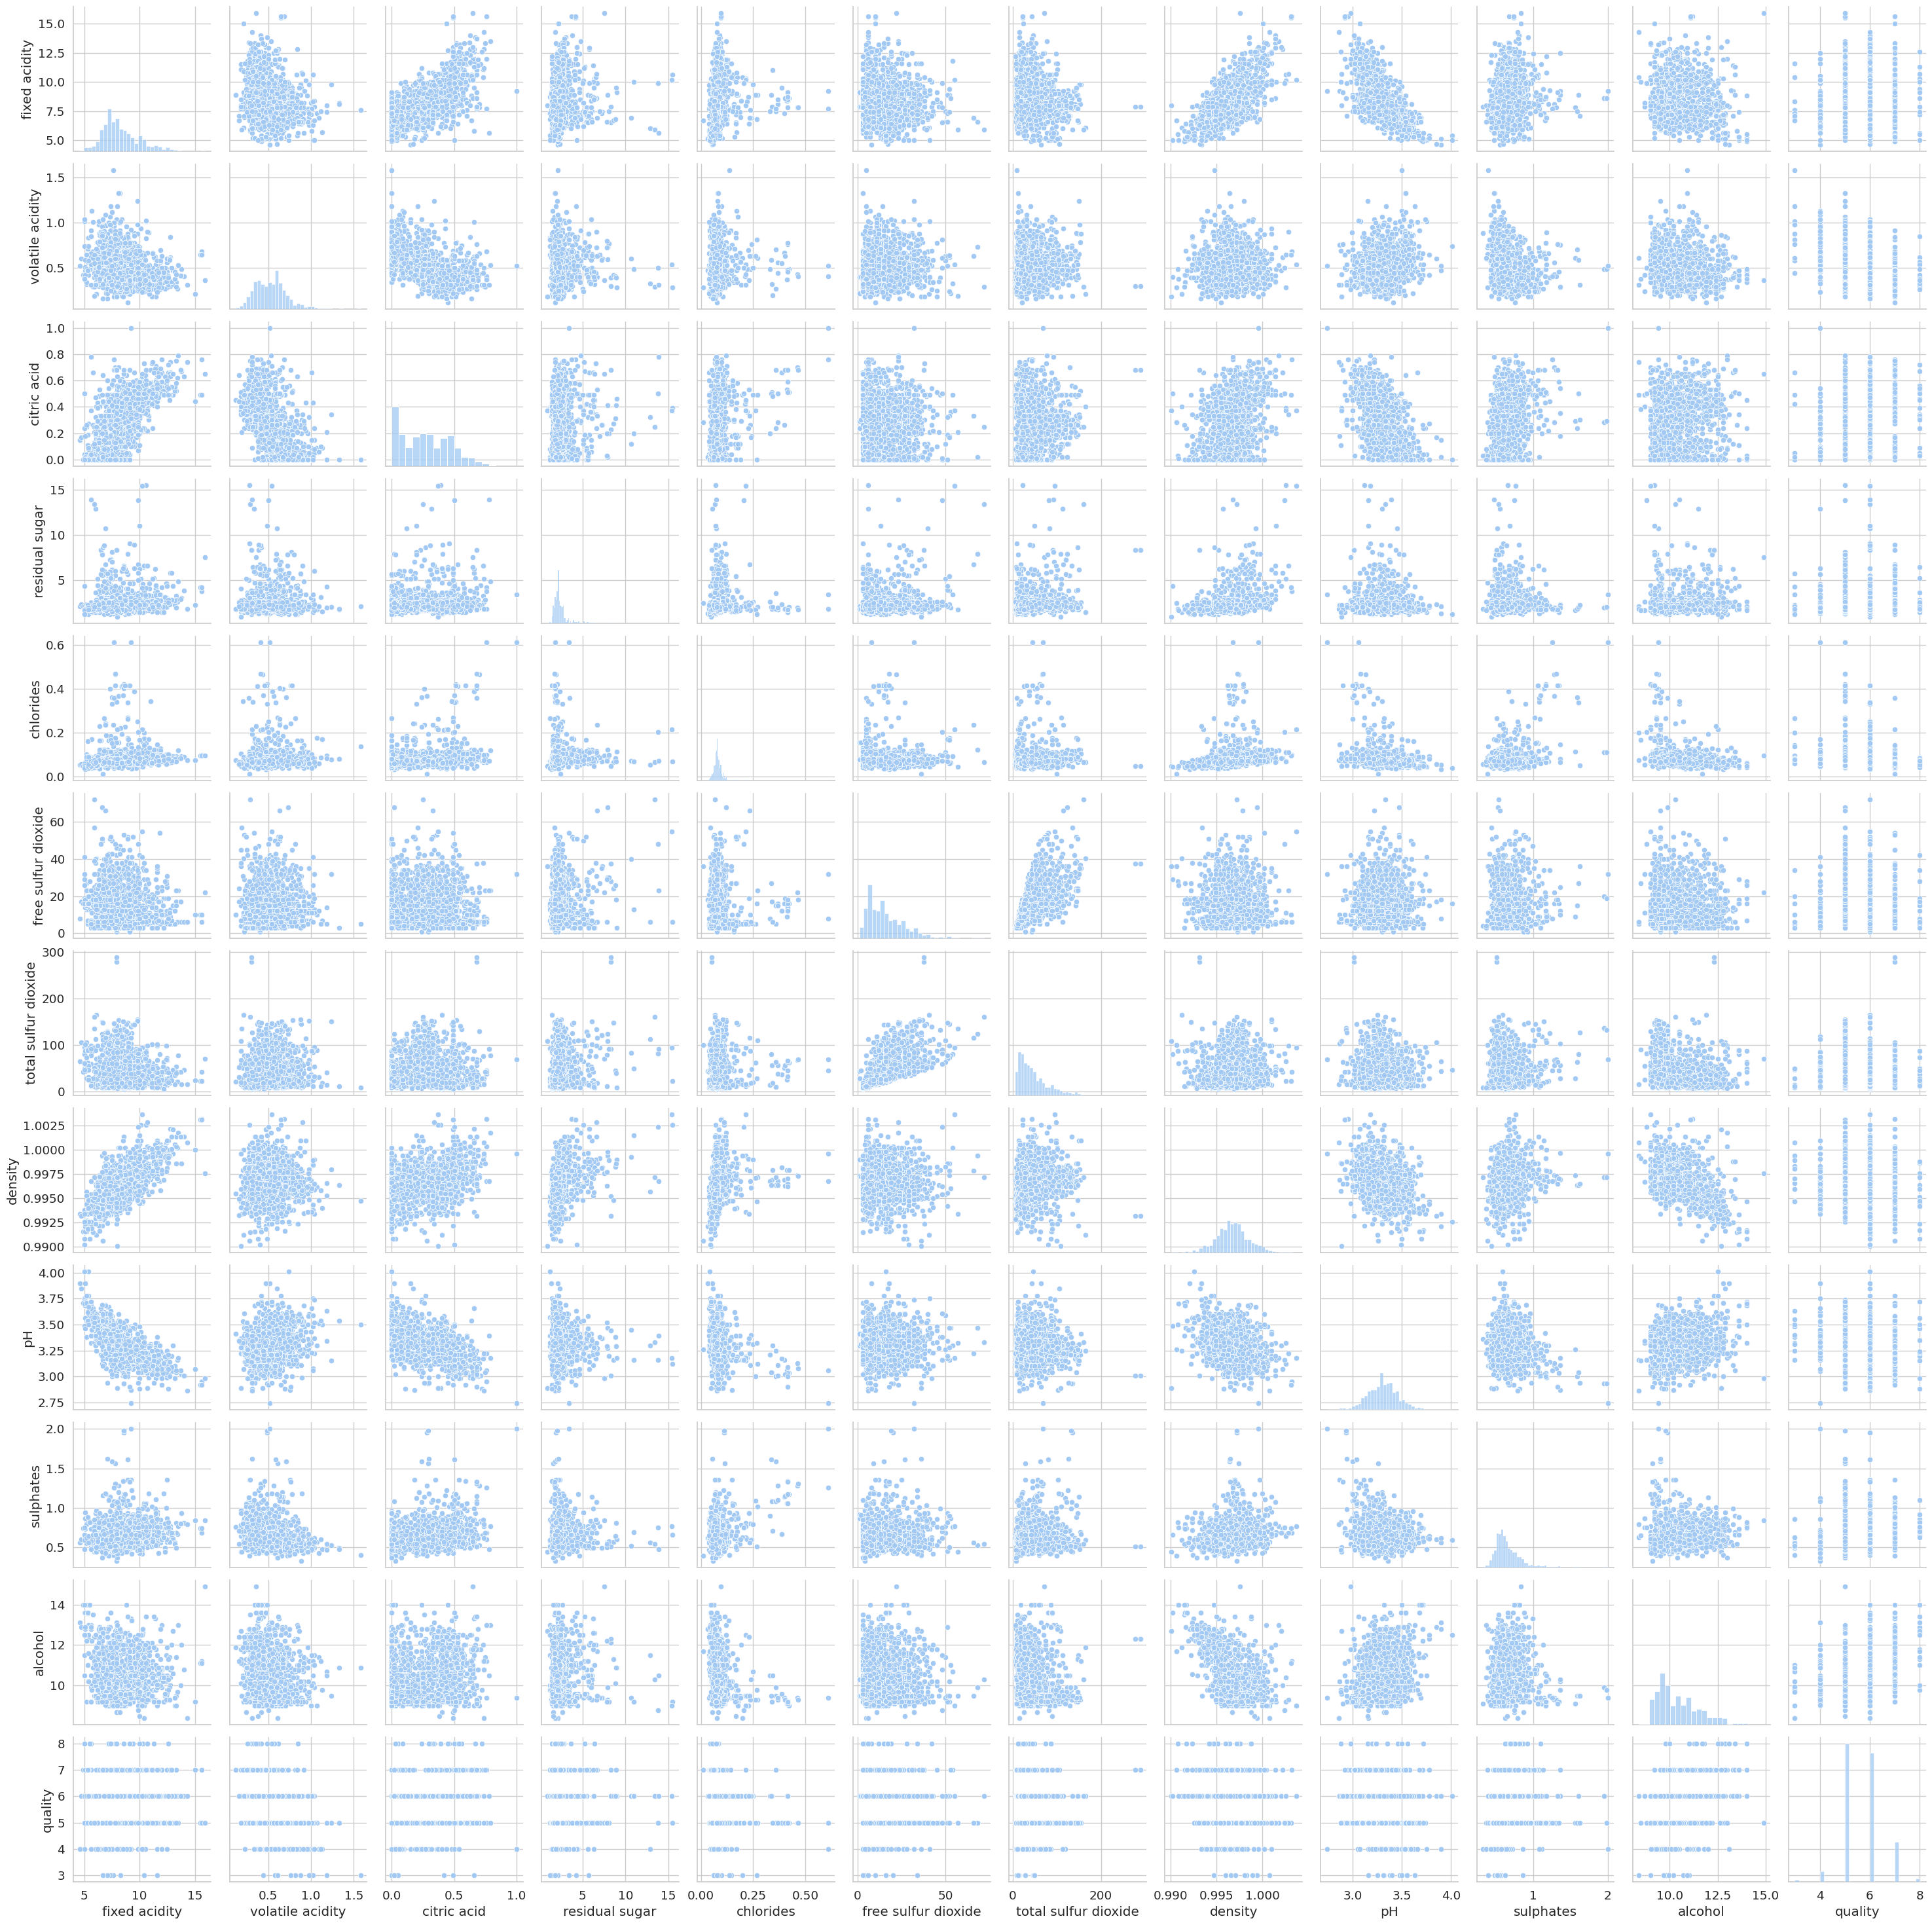

In [65]:
sns.pairplot(wine)
plt.show()

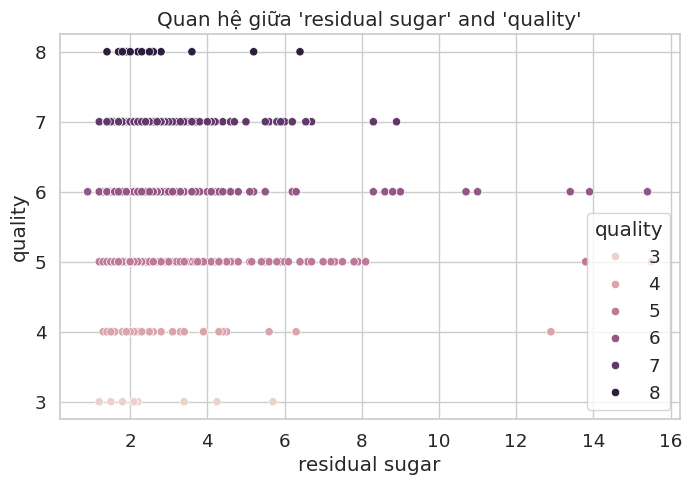

In [66]:


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="residual sugar",
    y="quality",
    hue="quality",
    data=wine
).set(title="Quan hệ giữa 'residual sugar' and 'quality'")

plt.show()


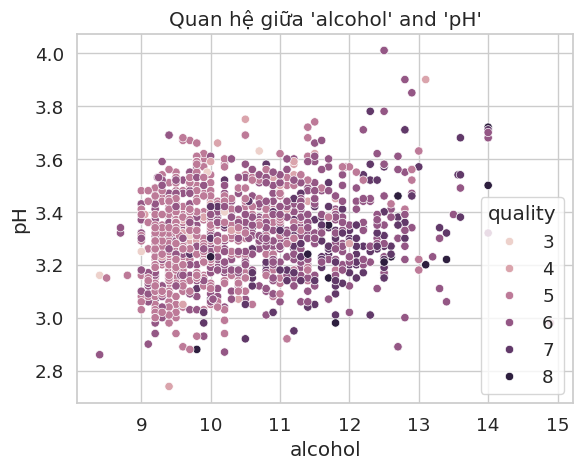

In [67]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality", # Add comma here
                data = wine).set(title = "Quan hệ giữa 'alcohol' and 'pH'");

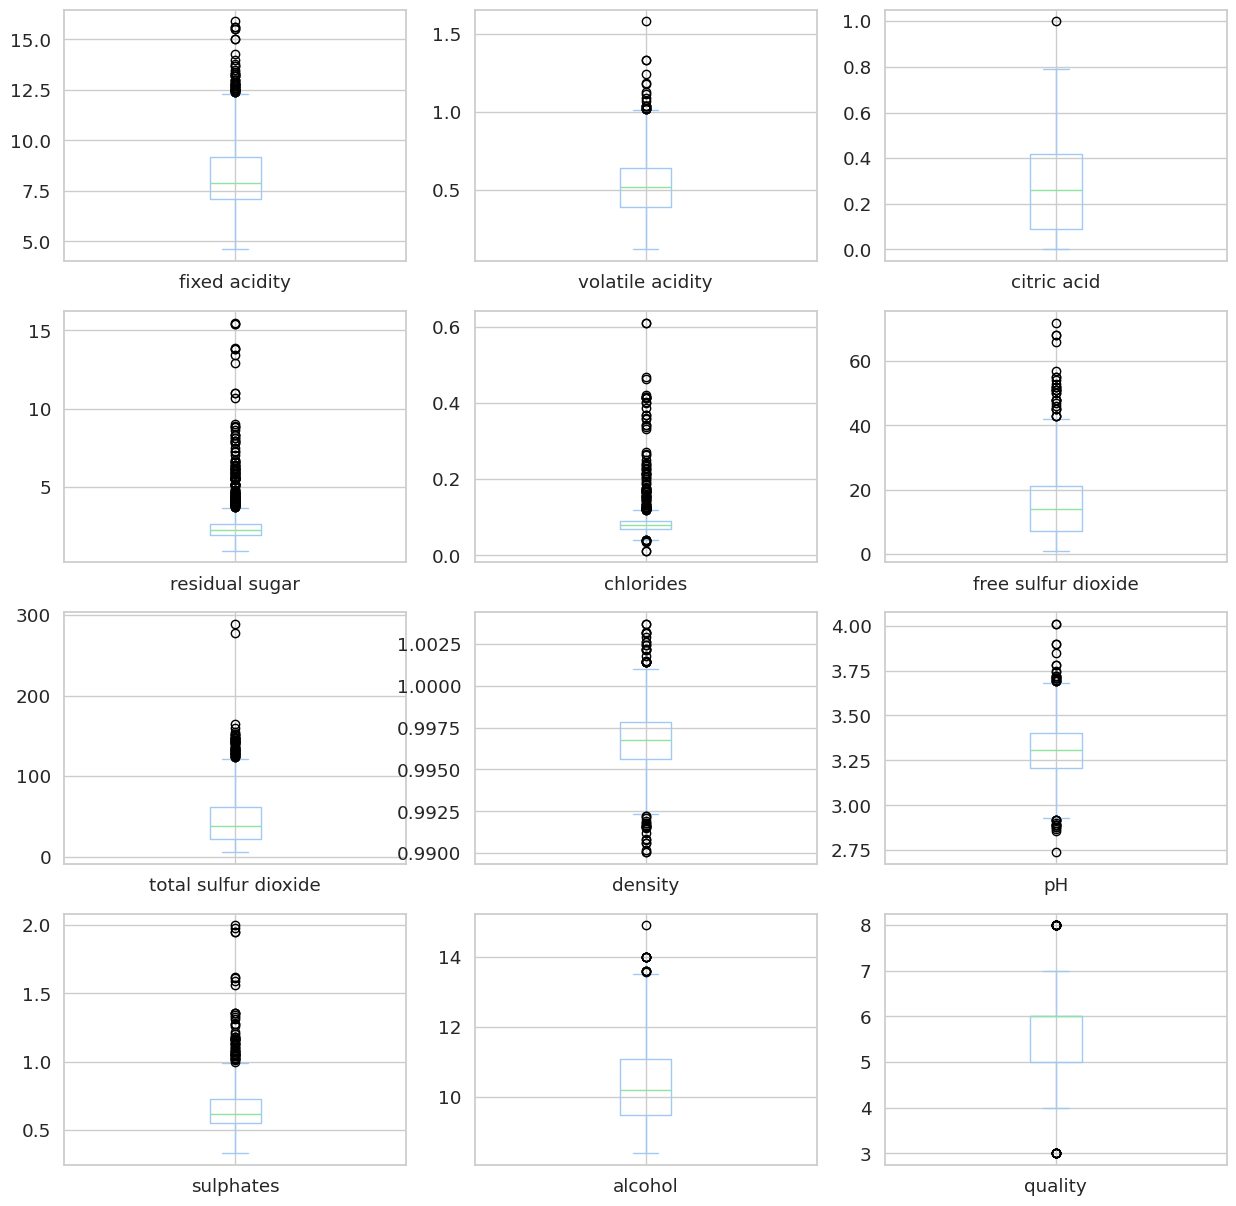

In [68]:
wine.plot(kind='box',subplots=True, layout=(4,3), figsize=(15,15),
          sharex=False,sharey = False)
plt.show()

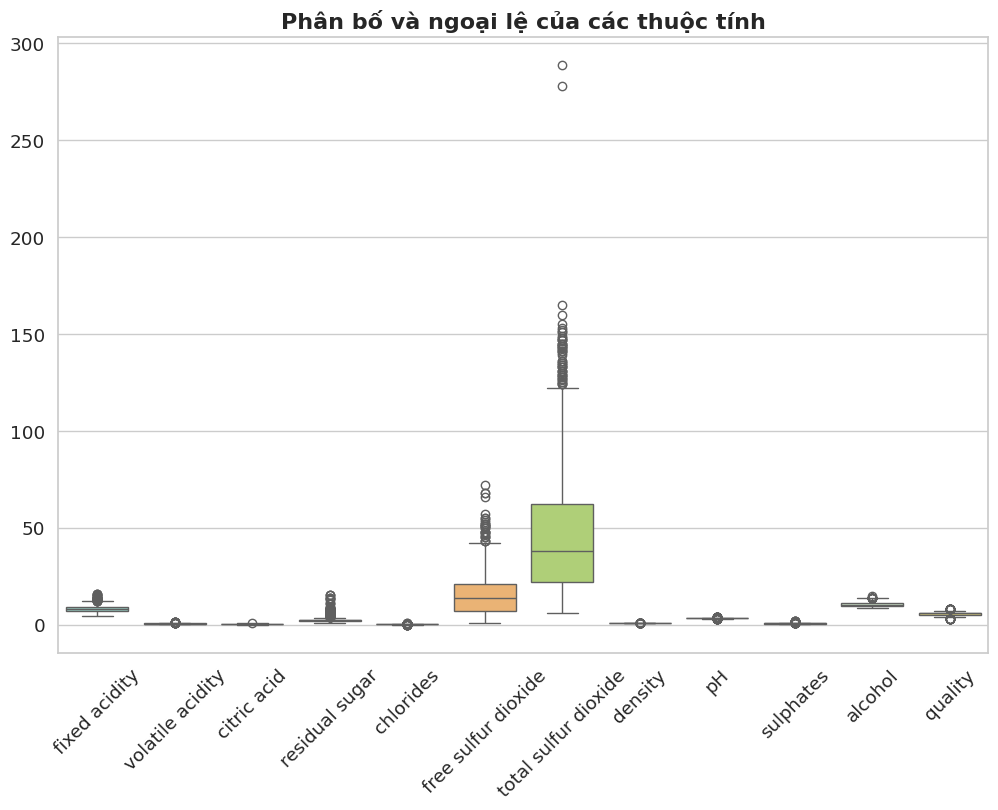

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(data=wine, palette='Set3')
plt.title('Phân bố và ngoại lệ của các thuộc tính', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


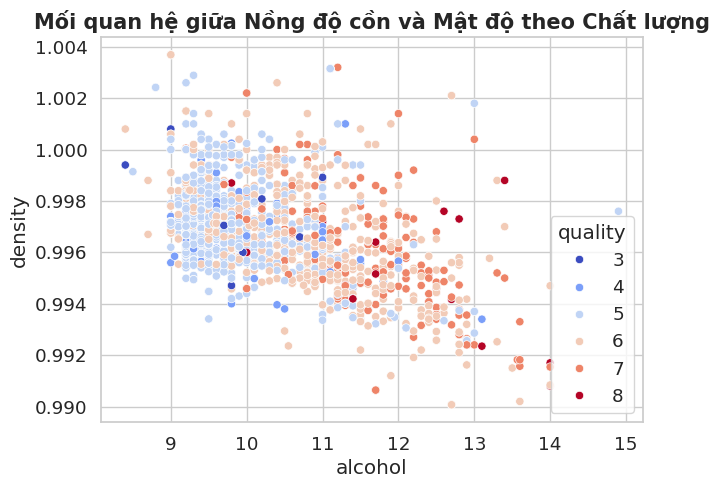

In [70]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='alcohol', y='density', hue='quality', data=wine, palette='coolwarm')
plt.title('Mối quan hệ giữa Nồng độ cồn và Mật độ theo Chất lượng', fontsize=15, fontweight='bold')
plt.show()


/tmp/ipython-input-3577293494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='alcohol', data=wine, palette='viridis')


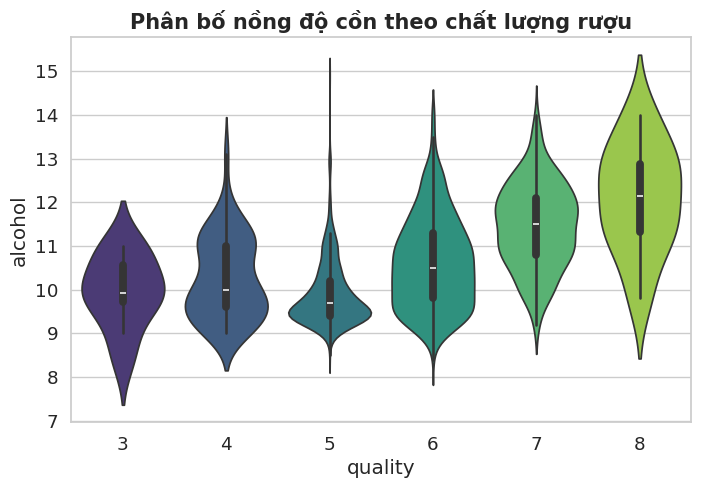

In [71]:
plt.figure(figsize=(8,5))
sns.violinplot(x='quality', y='alcohol', data=wine, palette='viridis')
plt.title('Phân bố nồng độ cồn theo chất lượng rượu', fontsize=15, fontweight='bold')
plt.show()



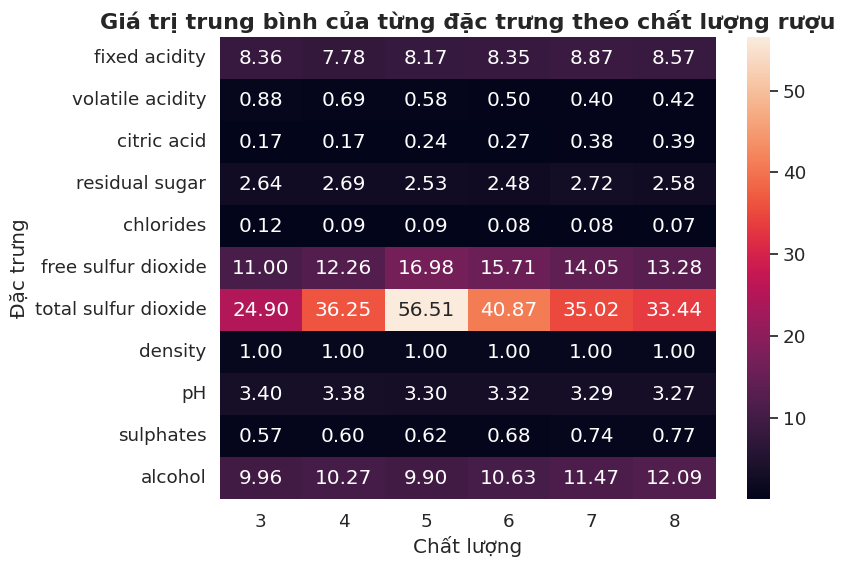

In [72]:
plt.figure(figsize=(8,6))
grouped = wine.groupby('quality').mean(numeric_only=True)
sns.heatmap(grouped.T,annot=True, fmt='.2f')
plt.title('Giá trị trung bình của từng đặc trưng theo chất lượng rượu', fontsize=16, fontweight='bold')
plt.xlabel('Chất lượng')
plt.ylabel('Đặc trưng')
plt.show()


# 🧾 Tổng kết

Qua các biểu đồ trực quan, ta có thể rút ra một số nhận xét:

- Phần lớn rượu có chất lượng trung bình (điểm 5–6).  
- **Nồng độ cồn** có xu hướng **tăng theo chất lượng rượu**.  
- **Axit bay hơi cao** thường liên quan đến **rượu chất lượng thấp**.  
- Một số đặc trưng có tương quan mạnh với chất lượng: `alcohol`, `volatile acidity`, `citric acid`.
